The Moving Average Convergence Divergence
 (MACD) was developed by Gerald Appel, and is based on the differences
 between two moving averages of different lengths, a Fast and a Slow moving
 average. A second line, called the Signal line is plotted as a moving
 average of the MACD. A third line, called the MACD Histogram is
 optionally plotted as a histogram of the difference between the
 MACD and the Signal Line.

 MACD = FastMA - SlowMA

Where:

FastMA is the shorter moving average and SlowMA is the longer moving average.
SignalLine = MovAvg (MACD)
MACD Histogram = MACD - SignalLine

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
SRC_DATA_FILENAME = 'data/EURUSD_D1.csv'
data = pd.read_csv(SRC_DATA_FILENAME)

In [3]:
close = data['Close']

In [7]:
num_periods_fast = 10 # fast EMA time period
K_fast = 2 / (num_periods_fast + 1) # fast EMA smoothing factor
ema_fast = 0
num_periods_slow = 40 # slow EMA time period
K_slow = 2 / (num_periods_slow + 1) # slow EMA smoothing factor
ema_slow = 0
num_periods_macd = 20 # MACD EMA time period
K_macd = 2 / (num_periods_macd + 1) # MACD EMA smoothing factor
ema_macd = 0

ema_fast_values = [] # track fast EMA values for visualization purposes
ema_slow_values = [] # track slow EMA values for visualization purposes
macd_values = [] # track MACD values for visualization purposes
macd_signal_values = [] # MACD EMA values tracker
macd_historgram_values = [] # MACD - MACD-EMA
for close_price in close:
  if (ema_fast == 0): # first observation
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)

  macd = ema_fast - ema_slow # MACD is fast_MA - slow_EMA
  if ema_macd == 0:
    ema_macd = macd
  else:
    ema_macd = (macd - ema_macd) * K_macd + ema_macd # signal is EMA of MACD values

  macd_values.append(macd)
  macd_signal_values.append(ema_macd)
  macd_historgram_values.append(macd - ema_macd)

data = data.assign(ClosePrice=pd.Series(close, index=data.index))
data = data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=data.index))
data = data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=data.index))
data = data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=data.index))
data = data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=data.index))
data = data.assign(MACDHistorgram=pd.Series(macd_historgram_values, index=data.index))

close_price = data['ClosePrice']
ema_f = data['FastExponential10DayMovingAverage']
ema_s = data['SlowExponential40DayMovingAverage']
macd = data['MovingAverageConvergenceDivergence']
ema_macd = data['Exponential20DayMovingAverageOfMACD']
macd_histogram = data['MACDHistorgram']

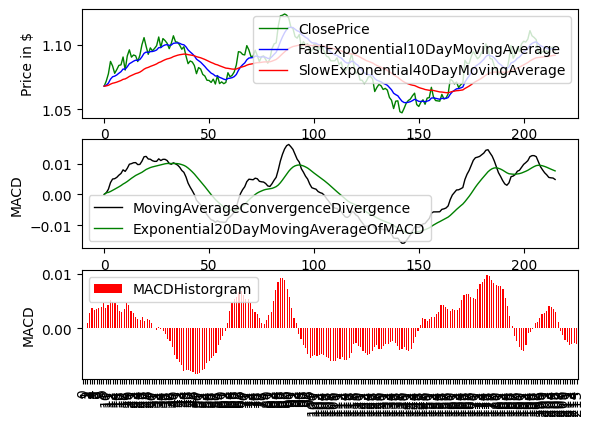

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Price in $')
close_price.plot(ax=ax1, color='g', lw=1., legend=True)
ema_f.plot(ax=ax1, color='b', lw=1., legend=True)
ema_s.plot(ax=ax1, color='r', lw=1., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=1., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=1., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)
plt.show()